# Quickstart tutorial
This tutorial quickly shows you the data manipulation and visualization that this package is capable of. Most plots take just a few function calls to generate. Study the other tutorials for more in-depth explanations of how to use the functions we provide.

In [1]:
import covid19pandas as cod
global_df = cod.get_data_jhu()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


# Cumulative case counts by days since 100 cases

The following code plots cumulative case counts for the top ten countries with the most cases, with the x axis as the days since each country had 100 cases.

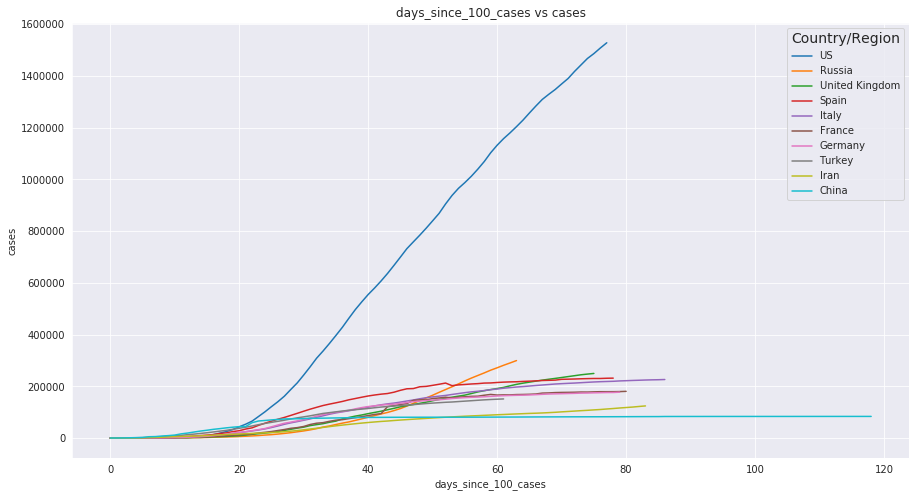

In [2]:
# Get the top ten
top_ten = cod.select_top_x_regions(
    data=global_df,
    data_col="cases",
    region_cols="Country/Region",
    x=10)

# Calculate the days since 100 cases
with_days_since = cod.calc_days_since_min_count(
    data=top_ten,
    data_col="cases",
    region_cols="Country/Region",
    min_count=100)

# Print the country names on the graph's legend in order of most to least counts 
legend_order = top_ten.sort_values(by=["date", "cases"], ascending=False)["Country/Region"][:10].values

# Make the plot
fig, ax = cod.plot_lines(
    data=with_days_since,
    x_col="days_since_100_cases",
    y_col="cases",
    group_col="Country/Region",
    legend_order=legend_order,
    dimensions=(15, 8))

# Daily new cases for top ten countries, with rolling mean
Instead of showing cumulative case counts, this plot shows counts of daily new cases, for the top ten countries with the most daily new cases on the most recent day recorded. It uses a 5 day rolling mean to smooth the lines.

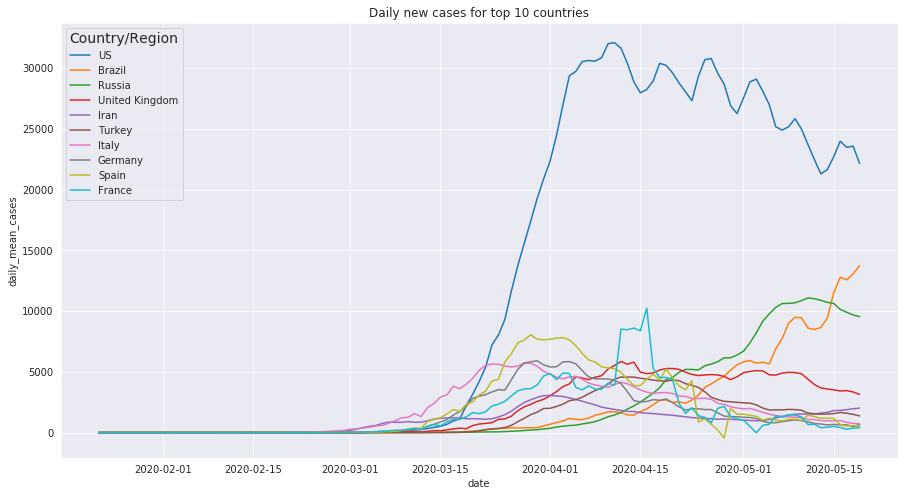

In [3]:
# Calculate the rolling mean
meaned = cod.calc_x_day_rolling_mean(
    data=global_df, data_cols="cases", 
    region_cols=["Country/Region", "Province/State"], 
    x=5)

# Calculate the daily change
daily_change = cod.calc_daily_change(
    data=meaned, 
    data_cols="mean_cases", 
    region_cols=["Country/Region", "Province/State"]) 

# Get the top ten countries
top_ten = cod.select_top_x_regions(
    data=daily_change, 
    data_col="daily_mean_cases", 
    region_cols="Country/Region", x=10) 

# Print the country names on the graph's legend in order of most to least counts 
legend_order = top_ten.sort_values(by=["date", "daily_mean_cases"], ascending=False)["Country/Region"][:10].values

# Make the plot
fig, ax = cod.plot_lines(
    data=top_ten, 
    x_col="date", 
    y_col="daily_mean_cases", 
    group_col="Country/Region", 
    legend_order=legend_order, 
    title="Daily new cases for top 10 countries", 
    dimensions=(15, 8)) 

# Cumulative cases and daily change, on different y scales
It's informative to look at the cumulative counts and the daily change in the counts for a country. However, those different count types cover pretty different ranges of numbers, so we've added a function that allows you to use the left y axis for one line and the right y axis for the other, so each can have its own scale.

Sometimes day to day data get a little jittery, so this plot also smooths the data with a 5 day rolling mean.

If you're viewing this interactively, feel free to sub in any particular country you want to look at by editing the `country` variable at the top of the code cell.

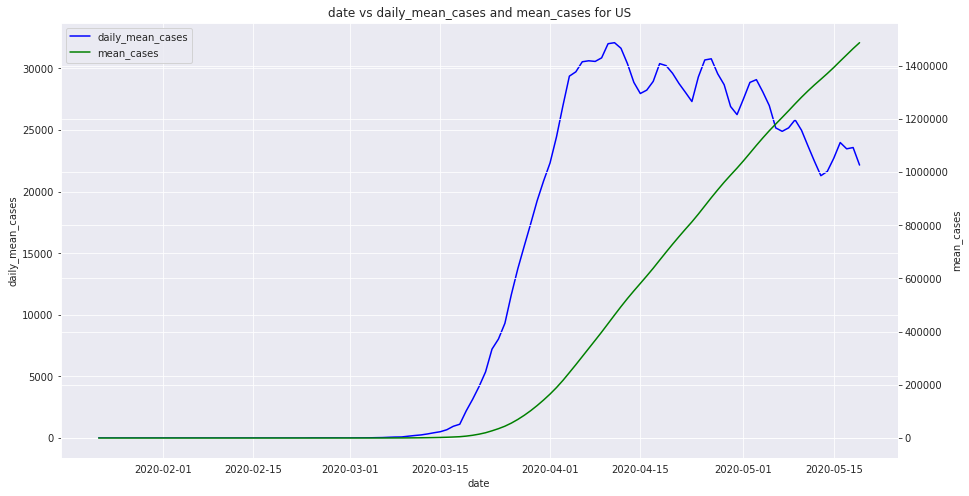

In [4]:
country = "US"
region_group_col = "Country/Region"

# Select the data for the country
country_df = cod.select_regions(
    data=global_df,
    region_col=region_group_col,
    regions=country)

# Calculate the rolling mean
meaned = cod.calc_x_day_rolling_mean(
    data=country_df,
    data_cols="cases",
    region_cols=region_group_col,
    x=5)

# Calculate the daily change
with_daily = cod.calc_daily_change(
    data=meaned,
    data_cols="mean_cases",
    region_cols=region_group_col)

# Make the plot
fig, ax = cod.plot_lines_two_y(
    data=with_daily,
    x_col="date",
    y1_col="daily_mean_cases",
    y2_col="mean_cases",
    title=f"date vs daily_mean_cases and mean_cases for {country}",
    dimensions=(15, 8))

# Daily new cases and daily new deaths for a country, on different y scales
It's also informative to look at the daily new cases and the daily new deaths for a country on the same graph. You can often see a spike in new cases followed by a spike in new fatalities a bit later.

The plot below also uses two different y scales for the different lines. It uses the left y axis for the cases counts and the right y axis for the fatalities counts. It also uses a 5 day rolling mean to smooth the lines.

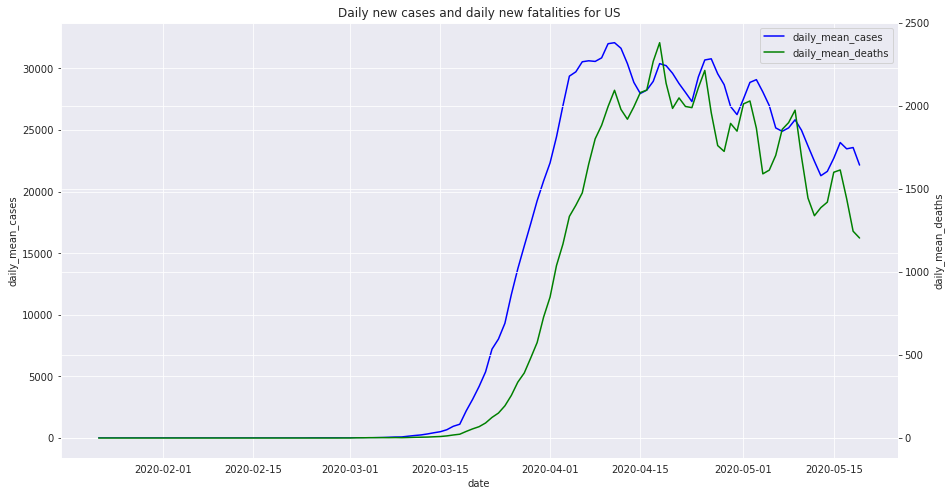

In [5]:
country = "US"

# Get the data for the country
country_df = cod.select_regions(
    data=global_df, 
    region_col="Country/Region", 
    regions=country) 

# Calculate a rolling mean
meaned = cod.calc_x_day_rolling_mean(
    data=country_df, 
    data_cols=["cases", "deaths"], 
    region_cols="Country/Region", 
    x=5) 

# Calculate daily change
with_daily = cod.calc_daily_change(
    data=meaned, 
    data_cols=["mean_cases", "mean_deaths"], 
    region_cols="Country/Region") 

# Make the plot
fig, ax = cod.plot_lines_two_y(
    data=with_daily, 
    x_col="date", 
    y1_col="daily_mean_cases", 
    y2_col="daily_mean_deaths", 
    title=f"Daily new cases and daily new fatalities for {country}",
    dimensions=(15, 8)) 

# Custom formatting
Here is the previous plot again, but demonstrating some of the formatting options available in the built in plotting functions.

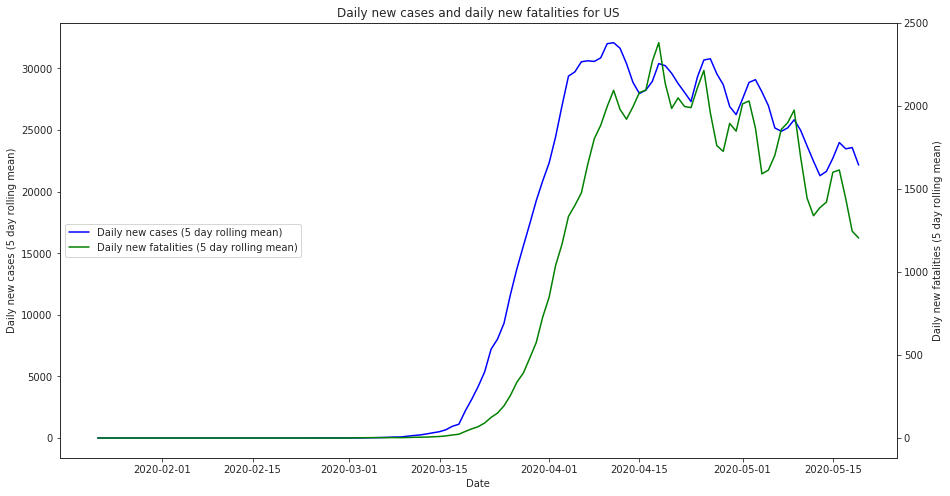

In [6]:
fig, ax = cod.plot_lines_two_y(
    data=with_daily, 
    x_col="date", 
    y1_col="daily_mean_cases", 
    y2_col="daily_mean_deaths", 
    title=f"Daily new cases and daily new fatalities for {country}",
    x_lab="Date", 
    y1_lab="Daily new cases (5 day rolling mean)", 
    y2_lab="Daily new fatalities (5 day rolling mean)", 
    legend_loc="center left",
    dimensions=(15, 8), 
    seaborn_style="ticks")